<a href="https://colab.research.google.com/github/kruthikakkamgari/AIML_Project_and_Labs/blob/main/Copy_of_AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [4]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [5]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [6]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

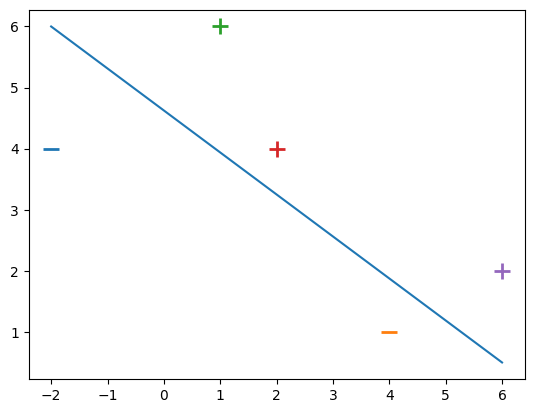

In [7]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

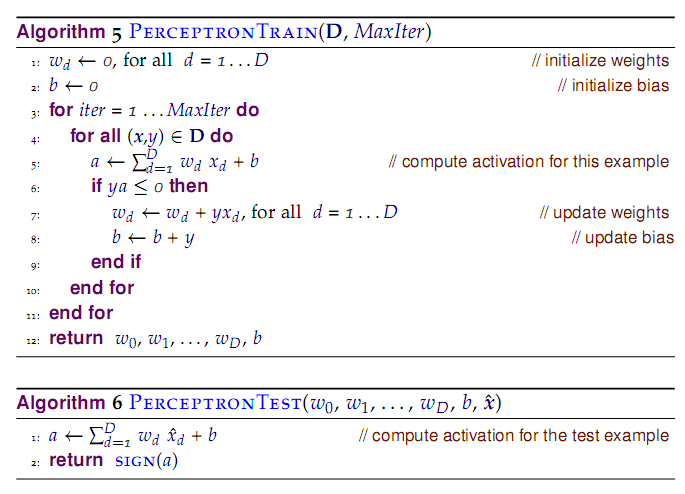

The algorithm is shown in the above image.

In [8]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [9]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

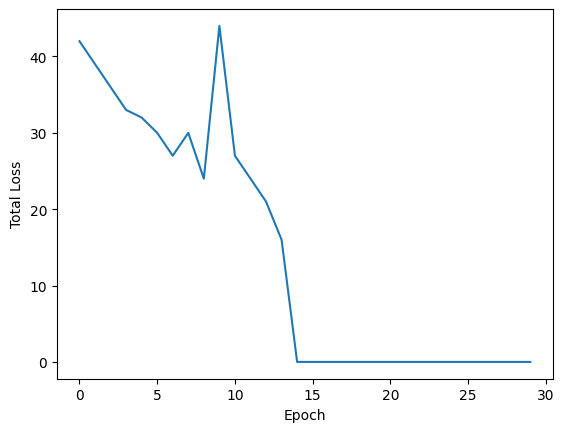

In [10]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

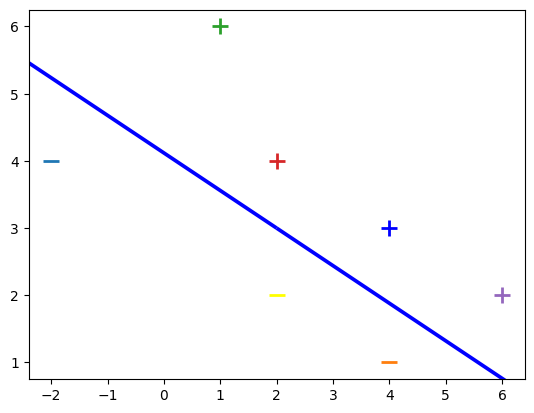

In [11]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



# **1.**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Load Banknote Dataset
data = np.loadtxt('data_banknote_authentication.txt', delimiter=',')

X = data[:, :-1]
y = data[:, -1]

y = np.where(y == 0, -1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term (-1)
bias = -1 * np.ones((X.shape[0], 1))
X = np.hstack((X, bias))


# 2. Perceptron parameters
epochs = 50
learning_rate = 0.01
weights = np.zeros(X.shape[1])

errors = []



Epoch 1: Errors = 9
Epoch 2: Errors = 10
Epoch 3: Errors = 9
Epoch 4: Errors = 9
Epoch 5: Errors = 12
Epoch 6: Errors = 11
Epoch 7: Errors = 9
Epoch 8: Errors = 6
Epoch 9: Errors = 8
Epoch 10: Errors = 7
Epoch 11: Errors = 9
Epoch 12: Errors = 11
Epoch 13: Errors = 8
Epoch 14: Errors = 10
Epoch 15: Errors = 10
Epoch 16: Errors = 13
Epoch 17: Errors = 9
Epoch 18: Errors = 7
Epoch 19: Errors = 9
Epoch 20: Errors = 10
Epoch 21: Errors = 8
Epoch 22: Errors = 9
Epoch 23: Errors = 10
Epoch 24: Errors = 9
Epoch 25: Errors = 9
Epoch 26: Errors = 11
Epoch 27: Errors = 11
Epoch 28: Errors = 11
Epoch 29: Errors = 12
Epoch 30: Errors = 12
Epoch 31: Errors = 8
Epoch 32: Errors = 10
Epoch 33: Errors = 11
Epoch 34: Errors = 9
Epoch 35: Errors = 7
Epoch 36: Errors = 9
Epoch 37: Errors = 10
Epoch 38: Errors = 10
Epoch 39: Errors = 11
Epoch 40: Errors = 8
Epoch 41: Errors = 10
Epoch 42: Errors = 12
Epoch 43: Errors = 13
Epoch 44: Errors = 11
Epoch 45: Errors = 9
Epoch 46: Errors = 10
Epoch 47: Errors = 

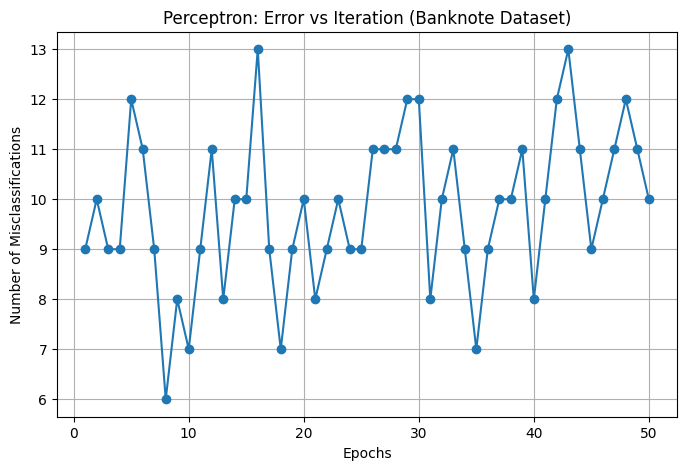

In [19]:
# 3. Training Perceptron
for epoch in range(epochs):
    total_errors = 0
    for i in range(len(X)):
        activation = np.dot(X[i], weights)
        prediction = 1 if activation >= 0 else -1
        if prediction != y[i]:
            weights += learning_rate * y[i] * X[i]
            total_errors += 1
    errors.append(total_errors)
    print(f"Epoch {epoch+1}: Errors = {total_errors}")

# 4. Plotting error over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), errors, marker='o')
plt.title('Perceptron: Error vs Iteration (Banknote Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


### 2. Effect of Learning Rate on Perceptron

The **learning rate** controls how fast the perceptron updates its weights.  
- A **small learning rate** (e.g. `0.001`) leads to **slow convergence**.  
- A **large learning rate** (e.g. `10`) may cause the model to **diverge**.  
- A **moderate rate** (e.g. `0.1`) usually gives **fast and stable convergence**.


3.

In [1]:
import numpy as np

# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])  # labels

# Perceptron algorithm
def perceptron(X, y, lr=0.1, epochs=10):
    X_bias = np.c_[np.ones(X.shape[0]), X]  # add bias term
    weights = np.zeros(X_bias.shape[1])

    for epoch in range(epochs):
        for i in range(len(X)):
            pred = np.dot(weights, X_bias[i]) > 0
            error = y[i] - pred
            weights += lr * error * X_bias[i]
        print(f"Epoch {epoch+1}, Weights: {weights}")

    return weights

final_weights = perceptron(X, y)


Epoch 1, Weights: [ 0.  -0.1  0. ]
Epoch 2, Weights: [ 0.1 -0.1  0. ]
Epoch 3, Weights: [ 0.1 -0.1  0. ]
Epoch 4, Weights: [ 0.1 -0.1  0. ]
Epoch 5, Weights: [ 0.1 -0.1  0. ]
Epoch 6, Weights: [ 0.1 -0.1  0. ]
Epoch 7, Weights: [ 0.1 -0.1  0. ]
Epoch 8, Weights: [ 0.1 -0.1  0. ]
Epoch 9, Weights: [ 0.1 -0.1  0. ]
Epoch 10, Weights: [ 0.1 -0.1  0. ]


##  Observations

- The perceptron **does not learn correctly** on the XOR dataset.
- It **keeps changing weights** or **stops early** without learning the right pattern.
- It **makes mistakes** because XOR is **not linearly separable**.

---

##  Conclusion

The **Perceptron works only** when data can be split by a straight line.  
It **fails** on problems like **XOR** that **need curves or complex boundaries**.


In [14]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [15]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


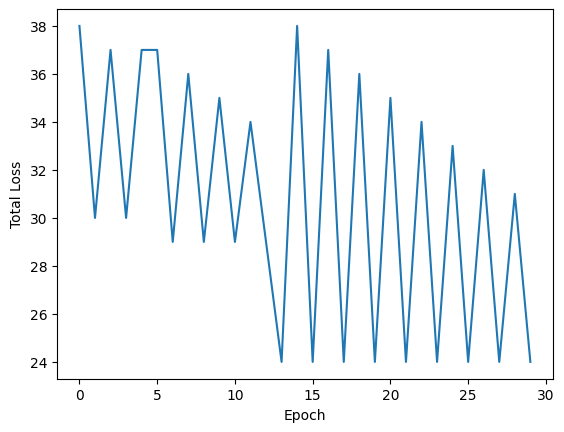

In [16]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.


###  Q1:

####  Dataset: Boolean AND Function

| x₁ | x₂ | y (AND) |
|----|----|---------|
| 0  | 0  |   0     |
| 0  | 1  |   0     |
| 1  | 0  |   0     |
| 1  | 1  |   1     |

---

#### i) Is this dataset learnable by Perceptron?

 **Yes**, the AND function is **linearly separable**.

---

#### ii) Weight Update Steps (Perceptron Learning)

Initialize:
- weights `w = [0, 0]`
- bias `b = 0`
- learning rate `η = 1`

---

#####  Epoch 1

| Input x   | y | Activation (w·x + b) | Prediction | Error? | Update       |
|-----------|---|----------------------|------------|--------|--------------|
| [0, 0]    | 0 | 0                    | 1          | ❌     | w = [0, 0], b = -1 |
| [0, 1]    | 0 | -1                   | 0          | ✅     | no change    |
| [1, 0]    | 0 | -1                   | 0          | ✅     | no change    |
| [1, 1]    | 1 | -1                   | 0          | ❌     | w = [1, 1], b = 0  |

---

#####  Epoch 2

| Input x   | y | Activation | Prediction | Error? | Update       |
|-----------|---|------------|------------|--------|--------------|
| [0, 0]    | 0 | 0          | 1          | ❌     | w = [1, 1], b = -1 |
| [0, 1]    | 0 | 0          | 1          | ❌     | w = [1, 0], b = -2 |
| [1, 0]    | 0 | -1         | 0          | ✅     | no change    |
| [1, 1]    | 1 | -1         | 0          | ❌     | w = [2, 1], b = -1 |

 Continue training — perceptron will eventually converge to correct weights (e.g., `w = [1, 1]`, `b = -1.5`).

---
###  Q2: How Many 2-bit Boolean Functions Are Learnable?

- Total functions: **16**
- Learnable (linearly separable): **14**
- **Not learnable**: **2** → XOR and XNOR

####  XOR Example:

| x₁ | x₂ | y |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

These can't be separated by a straight line → **Perceptron fails**

